In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [55]:
X = iris.data[:,[0,1]][iris.target != 2]
Y = iris.target[iris.target != 2]

In [56]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X,Y)

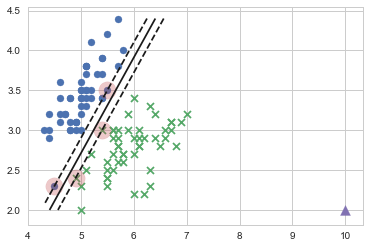

In [58]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)